In [16]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import os                                                                                     
import glob  
from collections import defaultdict

from docx import Document
import matplotlib.pyplot as plt

In [17]:
path = 'data/export/'
fns = [fn for fn in sorted(glob.glob(os.path.join(path, "*"))) if '_' in fn]
fns

['data/export/001_འདུལ་བ།_ཀ.docx', 'data/export/002_འདུལ་བ།_ཁ.docx']

In [42]:
def neg_examples_pages(fn):
    neg_fn = '{}.docx'.format(os.path.basename(fn).split('_')[0])
    neg_path = os.path.join(os.path.dirname(fn), neg_fn)
    with open(neg_path, 'rb') as f:
        doc = Document(f)
    
    pages = []
    for para in doc.paragraphs:
        page = para.text
        if page:
            pages.append(int(page))
    return pages

def find_stats(fn, neg_stats, pos_stats):                                                                           
    with open(fn, 'rb') as f:                                                                 
        doc = Document(f)
    
    pages = neg_examples_pages(fn)
    
    doc.tables[6].rows[0].cells[1].text                                                
    for i, table in enumerate(doc.tables):
        key = table.rows[2].cells[1].text
        type = table.rows[1].cells[1].text
        key += ' / ' + type 
        if i+1 <= max(pages):
            if i+1 in pages:
    #             text = table.rows[0].cells[1].text
    #             
                neg_stats[key] += 1
            else:
                pos_stats[key] += 1

In [43]:
def stats_to_csv(stats):                                                                      
    pass

In [44]:
neg_stats = defaultdict(int)
pos_stats = defaultdict(int)
for fn in fns:
    find_stats(fn, neg_stats, pos_stats)

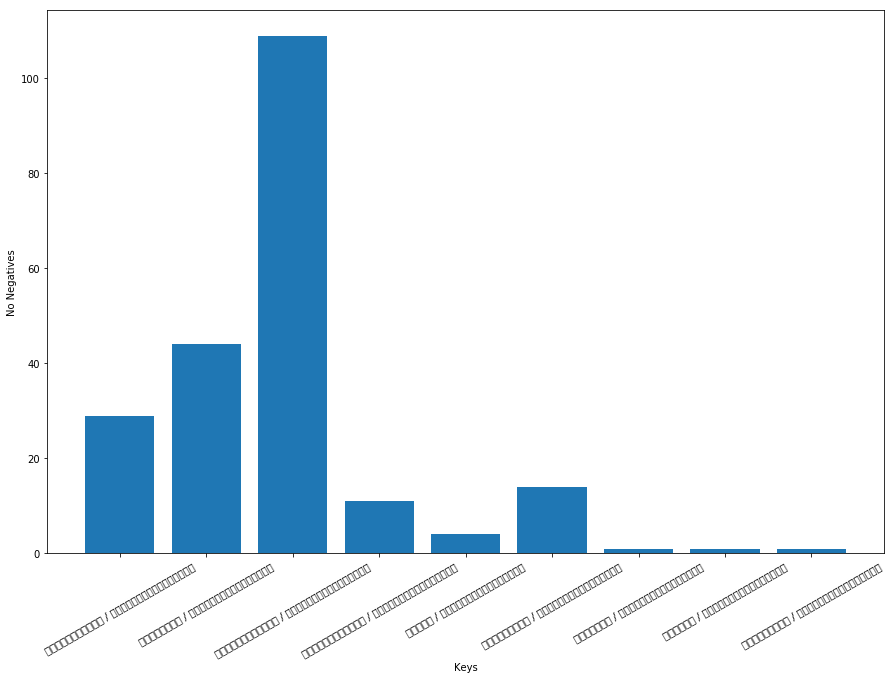

In [45]:
keys, counts = zip(*neg_stats.items())

plt.figure(figsize=(15, 10))
index = list(range(len(keys)))
plt.bar(index, counts)
plt.xlabel('Keys', fontsize=10)
plt.ylabel('No Negatives', fontsize=10)
plt.xticks(index, keys, fontsize=10, rotation=30)
plt.title('')
plt.show()

In [46]:
neg_stats

defaultdict(int,
            {'དེ་ལྟ་བུའི་ / དབྱེ་གཞི་དབྱེ་བ།': 29,
             '་ཡོད་དེ། / དབྱེ་གཞི་དབྱེ་བ།': 44,
             '་འདི་ལྟ་སྟེ། / དབྱེ་གཞི་དབྱེ་བ།': 109,
             'གང་ཡང་རུང་བ་ / དབྱེ་གཞི་དབྱེ་བ།': 11,
             'ཅེ་ན། / དབྱེ་གཞི་དབྱེ་བ།': 4,
             '་གང་ཞེ་ན། / དབྱེ་གཞི་དབྱེ་བ།': 14,
             'གང་སྟེ། / དབྱེ་གཞི་དབྱེ་བ།': 1,
             'འདི་ལ། / དབྱེ་གཞི་དབྱེ་བ།': 1,
             'དེ་དག་ལས་ / དབྱེ་གཞི་དབྱེ་བ།': 1})

In [47]:
pos_stats

defaultdict(int,
            {'་འདི་ལྟ་སྟེ། / དབྱེ་གཞི་དབྱེ་བ།': 48,
             '་གང་ཞེ་ན། / དབྱེ་གཞི་དབྱེ་བ།': 40,
             '་ཡོད་དེ། / དབྱེ་གཞི་དབྱེ་བ།': 9,
             'འདི་དག་སྟེ། / དབྱེ་གཞི་དབྱེ་བ།': 1})